In [14]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv("data.csv").set_index("Date").dropna()

In [15]:
df

,Unnamed: 0,Vasy1_PEX temperature_Cur,Vasy1_PEX temperature_Max,Vasy1_PEX temperature_Min,Vasy1_RAM temperature_Cur,Vasy1_RAM temperature_Max,Vasy1_RAM temperature_Min,Vasy2_PEX temperature_Cur,Vasy2_PEX temperature_Max,Vasy2_PEX temperature_Min,Vasy2_RAM temperature_Cur,Vasy2_RAM temperature_Max,Vasy2_RAM temperature_Min,Vasy3_CPU temperature_Cur,Vasy3_CPU temperature_Max,Vasy3_CPU temperature_Min,Vasy3_PCH temperature_Cur,Vasy3_PCH temperature_Max,Vasy3_PCH temperature_Min
Date,,,,,,,,,,,,,,,,,,,
2020-08-02 20:32:24.722926,1,85.129906,85.0,-85.0,85.129906,85.0,-85.0,85.129906,85.0,-85.0,85.129906,85.0,-85.0,85.129906,85.0,-85.0,85.129906,85.0,-85.0
2020-08-02 20:32:25.775528,2,69.502609,85.0,-85.0,69.502609,85.0,-85.0,69.502609,85.0,-85.0,69.502609,85.0,-85.0,69.502609,85.0,-85.0,69.502609,85.0,-85.0
2020-08-02 20:32:26.811283,3,49.553978,85.0,-85.0,49.553978,85.0,-85.0,49.553978,85.0,-85.0,49.553978,85.0,-85.0,49.553978,85.0,-85.0,49.553978,85.0,-85.0
2020-08-02 20:32:27.843233,4,1.845514,85.0,-85.0,1.845514,85.0,-85.0,1.845514,85.0,-85.0,1.845514,85.0,-85.0,1.845514,85.0,-85.0,1.845514,85.0,-85.0
2020-08-02 20:32:28.881657,5,-22.948042,85.0,-85.0,-22.948042,85.0,-85.0,-22.948042,85.0,-85.0,-22.948042,85.0,-85.0,-22.948042,85.0,-85.0,-22.948042,85.0,-85.0
2020-08-02 20:32:29.917303,6,-46.314796,85.0,-85.0,-46.314796,85.0,-85.0,-46.314796,85.0,-85.0,-46.314796,85.0,-85.0,-46.314796,85.0,-85.0,-46.314796,85.0,-85.0
2020-08-02 20:32:30.952127,7,-66.801926,85.0,-85.0,-66.801926,85.0,-85.0,-66.801926,85.0,-85.0,-66.801926,85.0,-85.0,-66.801926,85.0,-85.0,-66.801926,85.0,-85.0
2020-08-02 20:32:31.984779,8,-94.300369,85.0,-85.0,-94.300369,85.0,-85.0,-94.300369,85.0,-85.0,-94.300369,85.0,-85.0,-94.300369,85.0,-85.0,-94.300369,85.0,-85.0
2020-08-02 20:32:33.020290,9,-98.710793,85.0,-85.0,-98.710793,85.0,-85.0,-98.710793,85.0,-85.0,-98.710793,85.0,-85.0,-98.710793,85.0,-85.0,-98.710793,85.0,-85.0


In [ ]:
fig = plt.figure()
plt.scatter(i, y)
plt.pause(0.05)
plt.show()

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *

import datetime as dt

# list_date = [dt.datetime(2016,1,1).date(), dt.datetime(2016,1,2).date(), dt.datetime(2016,1,3).date(), dt.datetime(2016,1,4).date()]
list_date = [dt.datetime(2016,1,1), dt.datetime(2016,1,2), dt.datetime(2016,1,3), dt.datetime(2016,1,4)]

data = []
for i in range(3) : 
    list = [i/2+1, i/2+2, i/2+3, i/2+4]
    data.append(Scatter(x=list_date, y=list, name='y'+str(i)))
# figure = Figure(data=data)
# iplot(figure)
figure = FigureWidget(data=data)
figure

FigureWidget({
    'data': [{'name': 'y0',
              'type': 'scatter',
              'uid': 'b1c872a1-3fe…

In [19]:
import dash
from dash.dependencies import Output#, Event
import dash_core_components as dcc
import dash_html_components as html
from random import random
import plotly

app = dash.Dash(__name__)
app.layout = html.Div(
    html.Div([
        dcc.Graph(id='live-update-graph-scatter', animate=True),
        dcc.Graph(id='live-update-graph-bar'),
        dcc.Interval(
            id='interval-component',
            interval=1*1000
        )
    ])
)


@app.callback(Output('live-update-graph-scatter', 'figure'),
              events=[Event('interval-component', 'interval')])
def update_graph_scatter():

    traces = list()
    for t in range(2):
        traces.append(plotly.graph_objs.Scatter(
            x=[1, 2, 3, 4, 5],
            y=[(t + 1) * random() for i in range(5)],
            name='Scatter {}'.format(t),
            mode= 'lines+markers'
            ))
    return {'data': traces}

@app.callback(Output('live-update-graph-bar', 'figure'),
              events=[Event('interval-component', 'interval')])
def update_graph_bar():

    traces = list()
    for t in range(2):
        traces.append(plotly.graph_objs.Bar(
            x=[1, 2, 3, 4, 5],
            y=[(t + 1) * random() for i in range(5)],
            name='Bar {}'.format(t)
            ))
    layout = plotly.graph_objs.Layout(
    barmode='group'
)
    return {'data': traces, 'layout': layout}


if __name__ == '__main__':
    app.run_server(debug=True)

NameError: name 'Event' is not defined

In [20]:
import dash
from dash.dependencies import Output, Input
import dash_core_components as dcc
import dash_html_components as html
import plotly
import random
import plotly.graph_objs as go
from collections import deque

X = deque(maxlen=20)
X.append(1)
Y = deque(maxlen=20)
Y.append(1)


app = dash.Dash(__name__)
app.layout = html.Div(
    [
        dcc.Graph(id='live-graph', animate=True),
        dcc.Interval(
            id='graph-update',
            interval=1*1000
        ),
    ]
)

@app.callback(Output('live-graph', 'figure'),
              [Input('graph-update', 'n_intervals')])
def update_graph_scatter(input_data):
    X.append(X[-1]+1)
    Y.append(Y[-1]+Y[-1]*random.uniform(-0.1,0.1))

    data = plotly.graph_objs.Scatter(
            x=list(X),
            y=list(Y),
            name='Scatter',
            mode= 'lines+markers'
            )

    return {'data': [data],'layout' : go.Layout(xaxis=dict(range=[min(X),max(X)]),
                                                yaxis=dict(range=[min(Y),max(Y)]),)}


if __name__ == '__main__':
    app.run_server(host='0.0.0.0', port=8080 ,debug=True)

Dash is running on http://0.0.0.0:8080/

Dash is running on http://0.0.0.0:8080/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [22]:
import dash
from dash.dependencies import Output, Input
import dash_core_components as dcc
import dash_html_components as html
import plotly
import random
import plotly.graph_objs as go
from collections import deque

X = deque(maxlen=20)
X.append(1)
Y = deque(maxlen=20)
Y.append(1)


app = dash.Dash(__name__)
app.layout = html.Div(
    [
        dcc.Graph(id='live-graph', animate=True),
        dcc.Interval(
            id='graph-update',
            interval=1*1000
        ),
    ]
)

@app.callback(Output('live-graph', 'figure'),
              events=[Event('graph-update', 'interval')])
def update_graph_scatter():
    X.append(X[-1]+1)
    Y.append(Y[-1]+Y[-1]*random.uniform(-0.1,0.1))

    data = plotly.graph_objs.Scatter(
            x=list(X),
            y=list(Y),
            name='Scatter',
            mode= 'lines+markers'
            )

    return {'data': [data],'layout' : go.Layout(xaxis=dict(range=[min(X),max(X)]),
                                                yaxis=dict(range=[min(Y),max(Y)]),)}



if __name__ == '__main__':
    app.run_server(debug=True)

NameError: name 'Event' is not defined

In [23]:
import dash
from dash.dependencies import Output, Input
import dash_core_components as dcc
import dash_html_components as html
import plotly
import random
import plotly.graph_objs as go
from collections import deque

X = deque(maxlen=20)
X.append(1)
Y = deque(maxlen=20)
Y.append(1)


app = dash.Dash(__name__)
app.layout = html.Div(
    [
        dcc.Graph(id='live-graph', animate=True),
        dcc.Interval(
            id='graph-update',
            interval=1000,
            n_intervals = 0
        ),
    ]
)

@app.callback(Output('live-graph', 'figure'),
        [Input('graph-update', 'n_intervals')])


def update_graph_scatter(n):
    X.append(X[-1]+1)
    Y.append(Y[-1]+Y[-1]*random.uniform(-0.1,0.1))

    data = plotly.graph_objs.Scatter(
            x=list(X),
            y=list(Y),
            name='Scatter',
            mode= 'lines+markers'
            )

    return {'data': [data],'layout' : go.Layout(xaxis=dict(range=[min(X),max(X)]),
                                                yaxis=dict(range=[min(Y),max(Y)]),)}





if _name_ == '__main__':
    app.run_server(debug=True)

NameError: name '_name_' is not defined

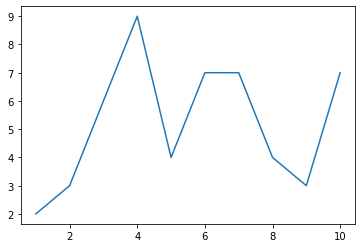

In [25]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("sampleText.txt","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()